<h1>Import Packages

In [1]:
import dlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tensorflow as tf
import numpy as np
import cv2

C:\Users\hande\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hande\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hande\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hande\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

dlib - 이미지 처리 라이브러리, face detection + landmark detectio + face alignment 처리<br>
matpotlib - 그래프 패키지, 이미지 출력 처리<br>
tensorflow - 머신러닝 라이브러리, model을 load하고 inference<br>
numpy - 행렬 연산 라이브러리<br>

# Load Models

In [2]:
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor('models/shape_predictor_5_face_landmarks.dat')

1 : 얼굴 영역 인식 모델을 로드해서 detector라는 변수로 저장<br>
2 : 5점 랜드마크 모델 로드해서 sp 변수로 저장(models 폴더에 저장해야 함, 없으면 githuh에서 다운로드)<br>

# Load Images

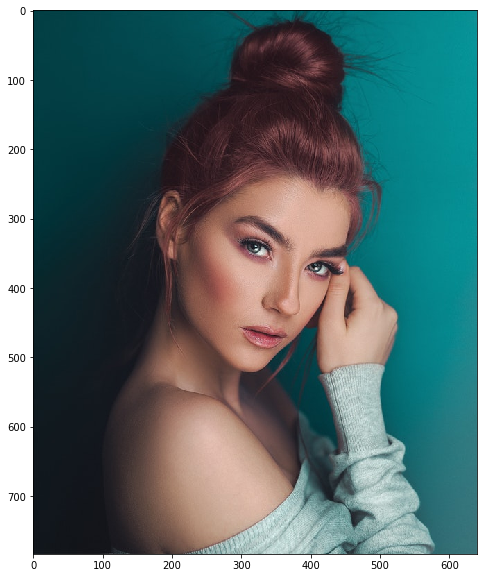

In [3]:
#img = dlib.load_rgb_image('imgs/01.jpg')
img = cv2.cvtColor(cv2.imread('imgs/01.jpg'), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16, 10))
plt.imshow(img)

1~2 : 이미지 로드<br>
5 : matplotlib으로 이미지 출력<br>

# Find Faces

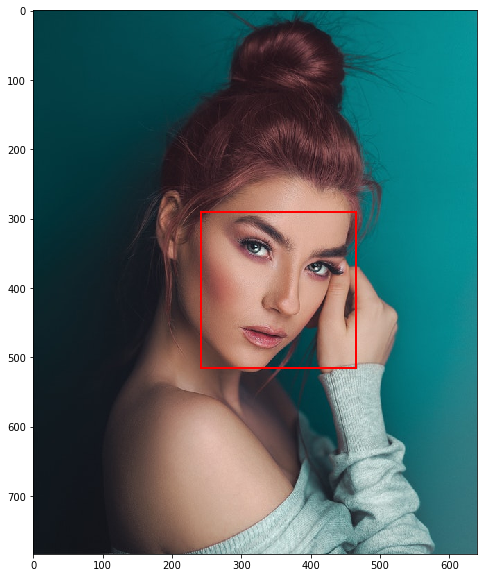

In [4]:
img_result = img.copy()

dets = detector(img, 1)

if len(dets) == 0:
    print('cannot find faces!')

fig, ax = plt.subplots(1, figsize=(16, 10))

for det in dets:
    x, y, w, h = det.left(), det.top(), det.width(), det.height()
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

ax.imshow(img_result)

3 : detector() = 이미지를 넣어 얼굴 영역을 찾는다<br>
5~6 : 얼굴을 찾지 못한 문구 출력<br>
10 : 얼굴 찾으면 for 루프를 실행<br>
11 : dets에는 dlib의 rectangle object 정보가 있고 x, y는 사각형의 좌측 상단점의 좌표 값<br>
13 : 직사각형을 그린다, 선의 두께와 색에 대한 설정을 줄 수 있다<br>
14 : 그래프 영역에 패치를 추가한다<br>

# Find Landmarks 5points

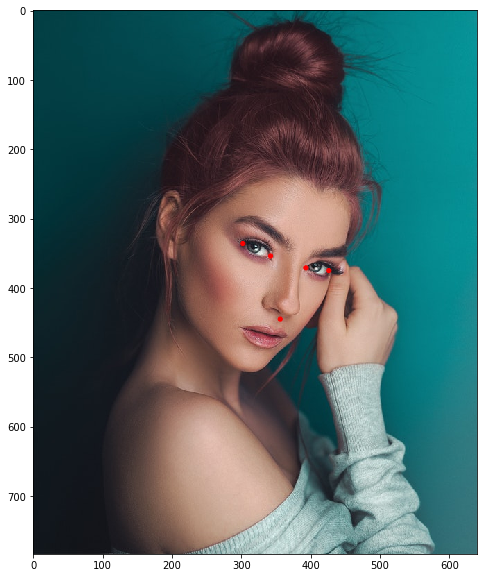

In [5]:
fig, ax = plt.subplots(1, figsize=(16, 10))

objs = dlib.full_object_detections()

for detection in dets:
    s = sp(img, detection)
    objs.append(s)
    
    for point in s.parts():
        circle = patches.Circle((point.x, point.y), radius=3, edgecolor='r', facecolor='r')
        ax.add_patch(circle)

ax.imshow(img_result)

5점 랜드마크를 찾아내는 부분<br>
3 : face alignment를 위해 f_o_d() 클래스를 선언해서 objs에 저장<br>
6 : 얼굴의 랜드마크를 찾는 과정(이미지, 얼굴의 위치정보)를 넣어줌<br>
9 : 랜드마크들의 위치를 point로 넣어서 for 루프 수행 / 5점 랜드마크니까 s.parts()는 5개의 점 좌표가 반환되어 for 루프를 5번 수행함<br>
10~11 : 5점 정보에 대한 좌표를 점으로 찍어서 출력<br>

# Align Faces

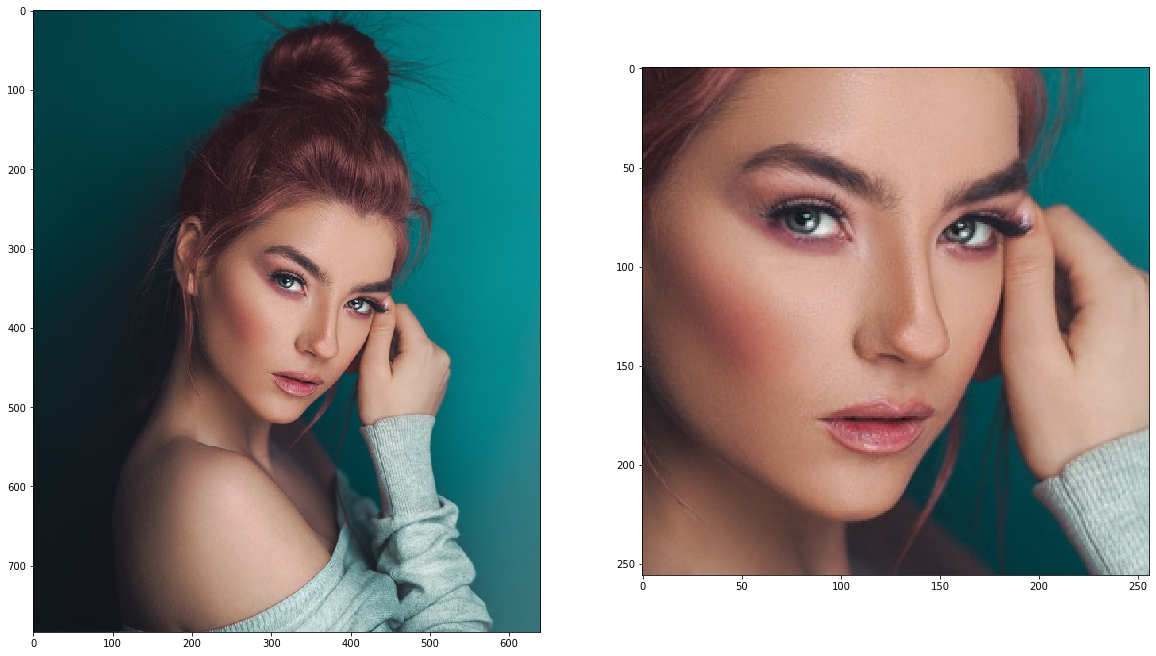

In [6]:
faces = dlib.get_face_chips(img, objs, size=256, padding=0.3)

fig, axes = plt.subplots(1, len(faces)+1, figsize=(20, 16))

axes[0].imshow(img)

for i, face in enumerate(faces):
    axes[i+1].imshow(face)

5점 정보를 이용해 alignment 진행 - 얼굴을 수평으로 맞추는 것<br>
1 : 얼굴을 수평으로 회전하여 얼굴 부분만 자른 이미지를 반환<br>
    (원본 이미지, f_o_d() 클래스 변수, 얼굴을 잘라낸 사이즈, 패딩 값)<br>
    사이즈는 얼굴 영역을 잘라낸 사이즈 값이고, 결과 이미지의 사이즈를 256으로 지정함<br>
    패딩 값은 얼굴을 포함하는 영역의 여유를 얼마나 주는가를 뜻한다<br>
    패딩 값이 작으면 눈과 코 부분을 더 확대한 결과, 크면 사진 전체를 담아내는 결과가 있다<br>
    (여기 비교해보기)<br>
3 : 이미지에서 검출한 얼굴 수만큼 plot을 진행<br>
5 : 원본 이미지 출력<br>
7~8 : 얼굴로 검출한 이미지들을 출력 / 만약 검출된 얼굴이 여러개면  결과 이미지도 여러개 출력 됨<br>

# Functionalize

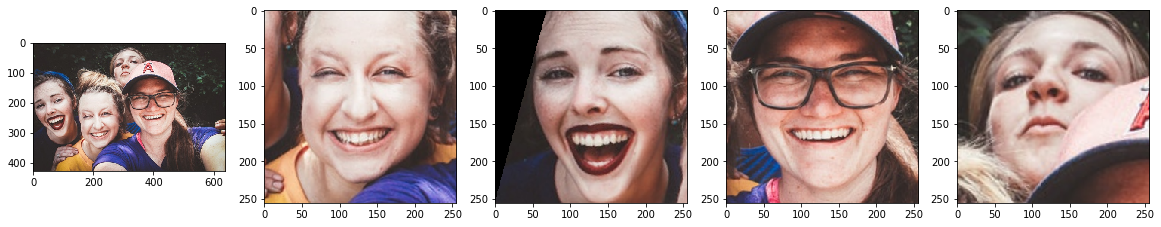

In [7]:
def align_faces(img):
    dets = detector(img, 1)
    
    objs = dlib.full_object_detections()

    for detection in dets:
        s = sp(img, detection)
        objs.append(s)
        
    faces = dlib.get_face_chips(img, objs, size=256, padding=0.35)
    
    return faces

# test
# test_img = dlib.load_rgb_image('imgs/02.jpg')
test_img = cv2.cvtColor(cv2.imread('imgs/02.jpg'), cv2.COLOR_BGR2RGB)

test_faces = align_faces(test_img)

fig, axes = plt.subplots(1, len(test_faces)+1, figsize=(20, 16))
axes[0].imshow(test_img)

for i, face in enumerate(test_faces):
    axes[i+1].imshow(face) 

1~12 : Face Alingment의 과정을 함수로 작성,<br>
    img를 함수 인자로 넣으면 aling된 결과 이미지를 반환해줌<br>
14~24 : 함수 테스트 진행 코드<br>

# Load BeautyGAN Pretrained
- https://drive.google.com/drive/folders/1pgVqnF2-rnOxcUQ3SO4JwHUFTdiSe5t9

In [8]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

saver = tf.train.import_meta_graph('models/model.meta')
saver.restore(sess, tf.train.latest_checkpoint('models'))
graph = tf.get_default_graph()

X = graph.get_tensor_by_name('X:0') # source
Y = graph.get_tensor_by_name('Y:0') # reference
Xs = graph.get_tensor_by_name('generator/xs:0') # output

INFO:tensorflow:Restoring parameters from models\model


BeautyGAN을 활용해서 Makeup Transfer를 진행하는 과정<br>
원작자가 제작한 BeautyGAN 모델의 Pretrainded 파일 구글드라이브에서 다운받기<br>
<br>
1 : tensorflow로 세션을 생성하고<br>
4 : 모델의 그래프를 불러온다<br>
5 : 모델의 가중치를 load한다<br>
6 : 가중치를 그래프에 저장한다<br>
8~9 : g_t_b_n : 그래프에서 노드의 이름으로 텐서를 불러온다<br>
8~10 : X는 소스이미지(화장 없는 이미지), Y는 화장 정보를 가져올 레퍼런스 이미지, Xs는 Generator의 결과 이미지<br>

# Preprocess and Postprocess Functions

In [9]:
def preprocess(img):
    return img.astype(np.float32) / 127.5 - 1.

def postprocess(img):
    return ((img + 1.) * 127.5).astype(np.uint8)

전처리 함수 : 0~255의 범위를 갖는 unsigned int 형을 -1~1의 범위를 갖는 32float로 변환<br>
후처리 함수 : 위의 과정을 반대로 진행<br>

# Load Images

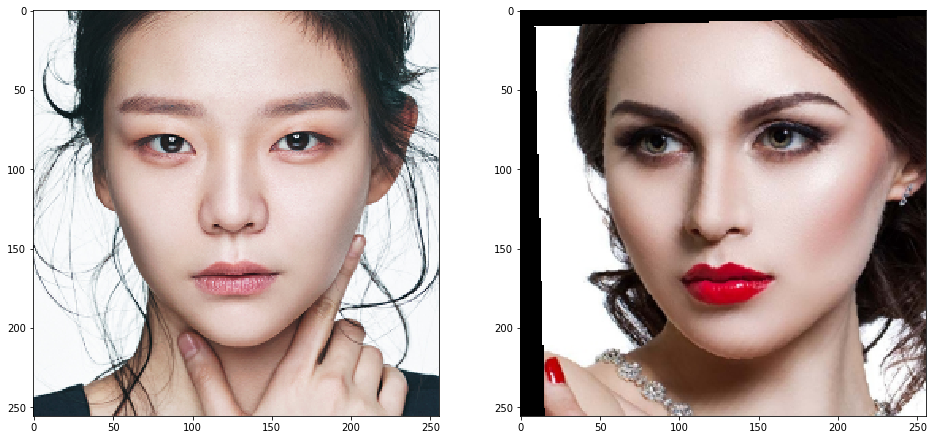

In [14]:
#img1 = dlib.load_rgb_image('imgs/12.jpg')
img1 = cv2.cvtColor(cv2.imread('imgs/esom.jpg'), cv2.COLOR_BGR2RGB)
img1_faces = align_faces(img1)

#img2 = dlib.load_rgb_image('imgs/makeup/XMY-014.png')
img2 = cv2.cvtColor(cv2.imread('imgs/makeup/XMY-136.png'), cv2.COLOR_BGR2RGB)
img2_faces = align_faces(img2)

fig, axes = plt.subplots(1, 2, figsize=(16, 10))
axes[0].imshow(img1_faces[0])
axes[1].imshow(img2_faces[0])

img1 : 소스 이미지<br>
img2 : 레퍼런스 이미지<br>
img1, 2 둘다 alignment 과정을 진행<br>
10~11 : 얼굴이 여러개 검출되어도 각각 이미지에서 0번 얼굴만 가져옴<br>

# Run

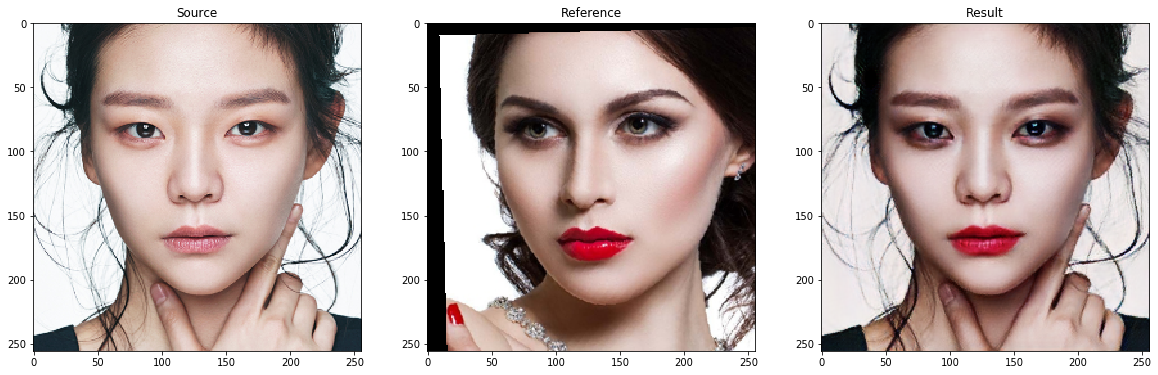

In [15]:
src_img = img1_faces[0]
ref_img = img2_faces[0]

X_img = preprocess(src_img)
X_img = np.expand_dims(X_img, axis=0)

Y_img = preprocess(ref_img)
Y_img = np.expand_dims(Y_img, axis=0)

output = sess.run(Xs, feed_dict={
    X: X_img,
    Y: Y_img
})

output_img = postprocess(output[0])

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].set_title('Source')
axes[0].imshow(src_img)
axes[1].set_title('Reference')
axes[1].imshow(ref_img)
axes[2].set_title('Result')
axes[2].imshow(output_img)

소스 이미지 : img1, src_img, X_img<br>
레퍼런스 이미지 : img2, ref_img, Y_img<br>
4, 7 : 전처리<br>
5, 8 : e_d 배열에 차원을 추가, 이를 통해 (255, 255, 3) -> (1, 255, 255, 3)의 형태가 된다<br>
    텐서플로에서 0번 axis는 배치 방향이기 때문에 앞에 차원이 붙는 것이고,<br>
    이렇게 해야 CNN 텐서플로에서 모델 적용이 가능 / 텐서플로 모델의 규격에 맞춰주는 것<br>
15 : 후처리<br>
18~23 : 소스, 레퍼런스, 결과 이미지 출력<br>